In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [2]:
# Create a simple binary classification dataset
X, y = make_classification(n_samples=200,     # total points
                           n_features=1,      # 2D input
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1,
                           flip_y=0.05,       # noise
                           random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.83      0.94      0.88        16

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.90        40
weighted avg       0.91      0.90      0.90        40



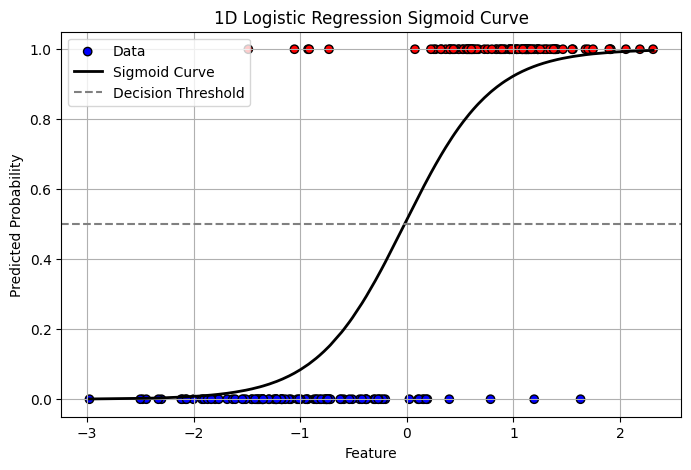

In [7]:
def plot_sigmoid_curve(model, X, y):
    # Sort values for smoother curve
    X_sorted = np.sort(X, axis=0)
    probs = model.predict_proba(X_sorted)[:, 1]

    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='Data')
    plt.plot(X_sorted, probs, color='black', linewidth=2, label='Sigmoid Curve')
    plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold')
    plt.xlabel("Feature")
    plt.ylabel("Predicted Probability")
    plt.title("1D Logistic Regression Sigmoid Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_sigmoid_curve(model, X, y)

In [ ]:
# Logistic regression using statsmodels
# Create 1D dataset
X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1, random_state=42)

# Add intercept manually (statsmodels doesn't do it automatically)
X_with_const = sm.add_constant(X)

# Fit logistic regression using statsmodels
model = sm.Logit(y, X_with_const)
result = model.fit()

# View summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.196834
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Jul 2025   Pseudo R-squ.:                  0.7160
Time:                        22:38:45   Log-Likelihood:                -19.683
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.212e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3528      0.461      0.766      0.444      -0.550       1.256
x1             3.3785      0.

In [9]:
print("Coefficients:", result.params)
print("P-values:", result.pvalues)
print("AIC:", result.aic)
print("McFadden R^2:", 1 - result.llf / result.llnull)  # same as summary

# Deviance = -2 * Log Likelihood
print("Null Deviance:", -2 * result.llnull)
print("Residual Deviance:", -2 * result.llf)

Coefficients: [0.35284821 3.37846001]
P-values: [4.43862158e-01 9.27451032e-09]
AIC: 43.366894781813244
McFadden R^2: 0.7160278806154021
Null Deviance: 138.62943611198907
Residual Deviance: 39.366894781813244


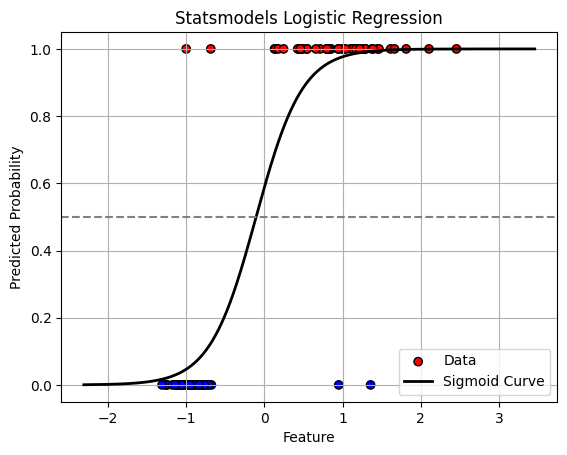

In [10]:
x_range = np.linspace(X.min() - 1, X.max() + 1, 300)
X_range_with_const = sm.add_constant(x_range)
probs = result.predict(X_range_with_const)

plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='Data')
plt.plot(x_range, probs, color='black', linewidth=2, label='Sigmoid Curve')
plt.axhline(0.5, color='gray', linestyle='--')
plt.xlabel("Feature")
plt.ylabel("Predicted Probability")
plt.title("Statsmodels Logistic Regression")
plt.grid(True)
plt.legend()
plt.show()